<a href="https://colab.research.google.com/github/atik666/attentionModel/blob/cloab/encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
from keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data = np.load("/content/drive/MyDrive/Colab/encoder/X.npy")
label = np.load("/content/drive/MyDrive/Colab/encoder/y.npy")
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(data,label, train_size=0.5, stratify=label)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5, stratify=y_rem)
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(1000, 64, 64, 3)
(1000,)
(500, 64, 64, 3)
(500,)
(500, 64, 64, 3)
(500,)


(None, None)

In [ ]:
IMAGE_SHAPE = (64, 64, 3)
      
model_name = "inception_v3"
#feature_extractor_model="https://tfhub.dev/google/tf2-preview/%s/feature_vector/4" %model_name

feature_extractor_model="https://tfhub.dev/google/imagenet/resnet_v1_101/classification/5"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=IMAGE_SHAPE, trainable=False)      
num_class = 10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              44656553  
_________________________________________________________________
dense (Dense)                (None, 10)                10020     
Total params: 44,666,573
Trainable params: 10,020
Non-trainable params: 44,656,553
_________________________________________________________________
Epoch 1/50
32/32 [==============================] - 16s 203ms/step - loss: 1.3227 - accuracy: 0.6200 - val_loss: 0.4429 - val_accuracy: 0.8380
Epoch 2/50
32/32 [==============================] - 3s 94ms/step - loss: 0.3494 - accuracy: 0.8560 - val_loss: 0.3047 - val_accuracy: 0.8900
Epoch 3/50
32/32 [==============================] - 3s 106ms/step - loss: 0.2754 - accuracy: 0.8870 - val_loss: 0.2684 - val_accuracy: 0.9000
Epoch 4/50
32/32 [==============================] - 3s 95ms/step - loss: 0.

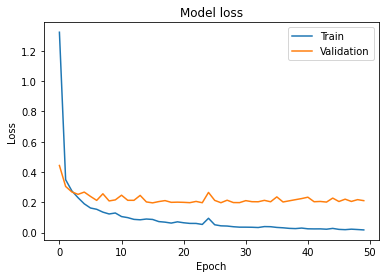

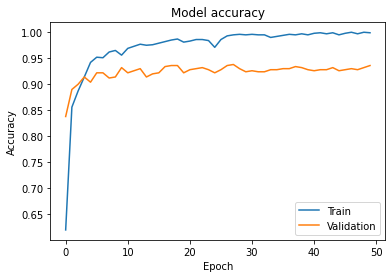

[[50  0  0  0  0  0  0  0  0  0]
 [ 0 40  1  9  0  0  0  0  0  0]
 [ 0  1 45  3  0  0  0  0  0  1]
 [ 0 10  3 36  0  0  0  0  1  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  4  0  1  0  0 45  0]
 [ 0  0  1  0  0  2  0  0  0 47]]
acc :  92.60000000000001


In [ ]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_class)
])

model.summary()          
         
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
     
# Train your model using the early stopping callback
h_callback = model.fit(X_train, y_train, batch_size = 32,
           epochs = 50, validation_data = (X_val, y_val))

loss, acc= model.evaluate(X_test, y_test)
print('Test Accuracy: %f' % (acc*100))

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()
  
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.show()
  
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print('acc : ', np.trace(conf)/np.sum(conf)*100)

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, kernel_size=(3,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_class,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train your model using the early stopping callback
model.fit(X_train, y_train, batch_size = 16,
           epochs = 50, validation_data = (X_val, y_val))

loss, acc= model.evaluate(X_test, y_test)
print('Test Accuracy: %f' % (acc*100))

from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = pred.argmax(axis = 1)
conf = confusion_matrix(y_test, pred)
print(conf)

Epoch 1/50
63/63 [==============================] - 2s 17ms/step - loss: 1.8998 - accuracy: 0.2630 - val_loss: 1.4257 - val_accuracy: 0.4780
Epoch 2/50
63/63 [==============================] - 1s 13ms/step - loss: 1.1263 - accuracy: 0.5510 - val_loss: 0.8872 - val_accuracy: 0.6220
Epoch 3/50
63/63 [==============================] - 1s 13ms/step - loss: 0.6189 - accuracy: 0.7450 - val_loss: 0.3680 - val_accuracy: 0.8500
Epoch 4/50
63/63 [==============================] - 1s 13ms/step - loss: 0.4014 - accuracy: 0.8390 - val_loss: 0.3524 - val_accuracy: 0.8660
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3453 - accuracy: 0.8710 - val_loss: 0.4797 - val_accuracy: 0.7960
Epoch 6/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3520 - accuracy: 0.8590 - val_loss: 0.2700 - val_accuracy: 0.8880
Epoch 7/50
63/63 [==============================] - 1s 13ms/step - loss: 0.2523 - accuracy: 0.8980 - val_loss: 0.2548 - val_accuracy: 0.8920
Epoch 8/50
63